# Test Notebook

This notebook is just to test out the usage of Jupyter to see if it will be useful for this thesis.

## Example of Using Pandas

In [2]:
import pandas as pd
import numpy as np

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

plot = ts.plot(title='Random Time Series Data')

In [33]:
df = pd.read_csv("/home/kmacrae/gem5/results.csv", 
                 names=["Branch Predictor", "Program", "Total Branches Predicted", "Total Branches Mispredicted"])
df.set_index("Branch Predictor")
df.head()

,Branch Predictor,Program,Total Branches Predicted,Total Branches Mispredicted
0,LTAGE,bitcnts,3573,688
1,BiModeBP,bitcnts,3801,745


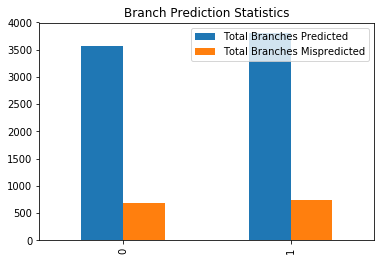

In [34]:
summary = df.plot.bar(title="Branch Prediction Statistics")

# Example of Using Matplotlib

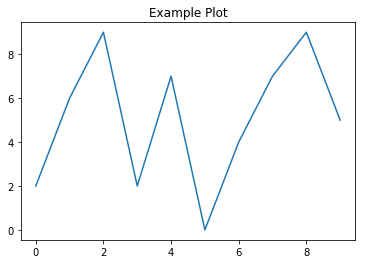

In [31]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [2, 6, 9, 2, 7, 0, 4, 7, 9, 5]

plt.plot(x, y)
plt.title('Example Plot')
plt.show()

## Example of Fetching from the Postgres Database

In [3]:
import psycopg2

connect_str = "dbname='research' user='jupyter' host='192.168.1.22' password='jupyter'"
conn = psycopg2.connect(connect_str)
cur = conn.cursor()

# Get all the execution ids and the name of the associated program
cur.execute("""SELECT execution_id FROM program_execution;""")
rows = cur.fetchone()

cur.execute("""SELECT branch_id, branch_outcome FROM branch_history WHERE execution_id={};""".format(rows[0]))
row = cur.fetchone()
branch_outcome = row[1]
cur.execute("""SELECT instruction FROM instruction_history WHERE execution_id={} AND branch_id={};""".format(rows[0], row[0]))
branch_data = cur.fetchall()
df = pd.DataFrame(branch_data)
print("Branch Taken: {}\nInstruction History:".format(row[1]))
status = df.transpose()
res = pd.DataFrame([branch_outcome])

status

Branch Taken: False
Instruction History:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,xor,mov,ldis,addi,mov,mov,limm,and,stis,subi,stis,subi,limm,limm,limm,limm,rdip,stis,subi,wrip


## Example of Using SciKit Learn Multilayer Perceptron Classifier

In [24]:
from sklearn.neural_network import MLPClassifier
import pandas

X = pandas.DataFrame([[0., 0.], [1., 1.]])
y = pandas.DataFrame([0, 1]).transpose().values

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y)

clf.predict([[2., 2.], [-1., -2.]])

ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [26]:
y[0]

array([0, 1])

### Can Easily use the classifier with .predict

In [35]:
clf.predict([[3., 1.]])

array([1])

In [36]:
x = bool(int("0"))
print(x)

False
